# Wavelength Stability

### How well do you need to know the effective centre wavelength of a bandpass in order to do TOLIMAN?

In [107]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
import matplotlib as mpl

mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
mpl.rcParams['font.size']=14               #10 
mpl.rcParams['savefig.dpi']= 200             #72 


This basically implements the same thing Nem Jovanovic did, ie (verbatim from Nem)

Assumptions:

- Star spots can be 500-2000K cooler than the typical surface temp for a star. I assumed a constant temperature of 1000K.

- Star spots can cover as much as 30% of the surface of a star at the peak of the solar cycle. I assumed 15% surface coverage.

- Although star spots come in and out of view as the star rotates, and evolve with >me, I took two cases,

1) a star with a constant surface temp. of 5700 K (no spots)

2) A star with 85% of the surface at 5700 K and 15% at 4700 K (effec>ve temp. 5550 K)

- The star is unresolved of course so I believe its ok to average these two regions together like this as we will see a composite spectrum based on what comes form the warmer and cooler regions.

- I only took into account blackbody radiation, no spectral features and noise in the con>nuum.

In [108]:
h = 6.62607004e-34
c = 299792458
kB = 1.38064852e-23

def planck(wavel,T):
    # return spectral radiance per unit wavelength: W·sr−1·m−3
    return 2*h*c*c*(wavel**-5)  * 1./(np.exp(h*c/(wavel*kB*T))-1.)

In [109]:
wavels = np.linspace(200e-9,1200e-9)
T = 5700

fluxes = planck(wavels,T)

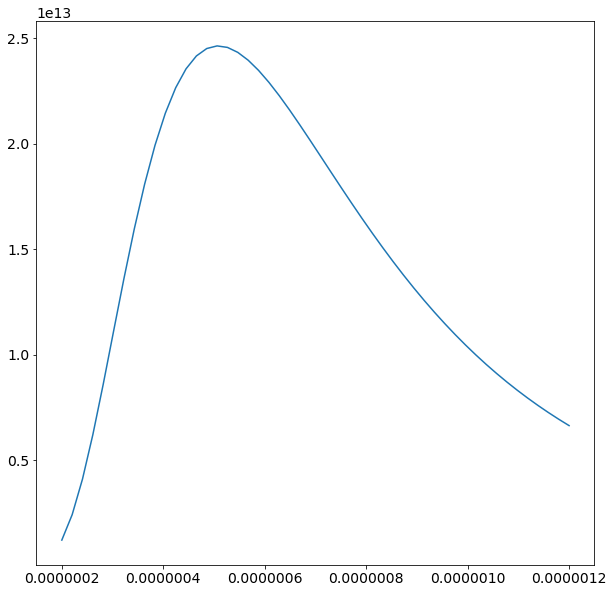

In [110]:
plt.plot(wavels,fluxes)

### Looks good! Let's now do Nem's calculation, but consider a broad bandpass

In [111]:
fmean, bw = 550e-9, 50e-9
fmin, fmax = fmean-bw/2., fmean+bw/2. # minimum and maximum filter edges

T_surface = 5700
T_spot = 4700

spot_coverage = 0.15

wavels = np.linspace(fmin,fmax)

In [112]:
fluxes_clear = planck(wavels,T_surface)
fluxes_spotted = (1-spot_coverage)*planck(wavels,T_surface) + spot_coverage*planck(wavels,T_spot)

In [113]:
mean_wavel_clear = np.sum(fluxes_clear*wavels)/np.sum(fluxes_clear)
mean_wavel_spotted = np.sum(fluxes_spotted*wavels)/np.sum(fluxes_spotted)

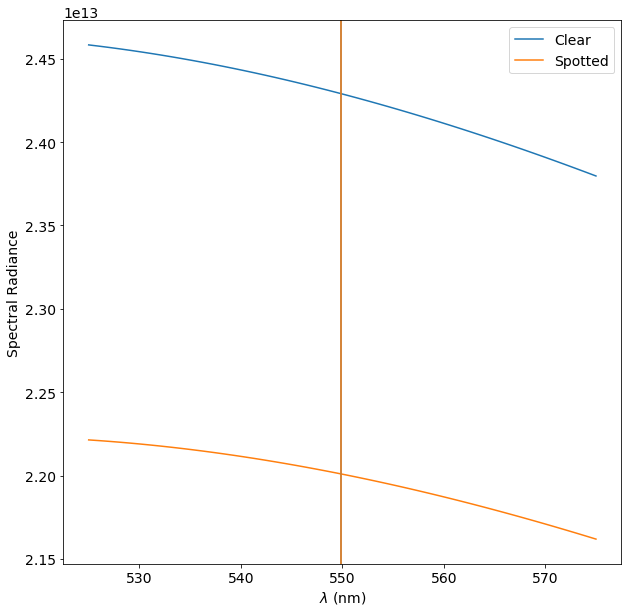

In [114]:
colours = mpl.rcParams['axes.color_cycle']

plt.plot(wavels*1e9,fluxes_clear,label='Clear')
plt.plot(wavels*1e9,fluxes_spotted,label='Spotted')
plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel('Spectral Radiance')
plt.legend()
plt.axvline(mean_wavel_clear*1e9,color=colours[0])
plt.axvline(mean_wavel_spotted*1e9,color=colours[1])

In [115]:
print 'Mean wavelength, spots:',mean_wavel_spotted*1e9
print 'Mean wavelength, no spots:',mean_wavel_clear*1e9
print 'Fractional Difference (ppm):',(mean_wavel_spotted-mean_wavel_clear)/mean_wavel_clear*1e6

Mean wavelength, spots: 549.88154977
Mean wavelength, no spots: 549.858347358
Fractional Difference (ppm): 42.1970708808


In [116]:
bandwidths = [1,2.5,5,10,25,50,100,200] # nm
diffs = [0.016888,0.10555,0.4222,1.6888,10.55,42.19,168.5,668.16] # ppm

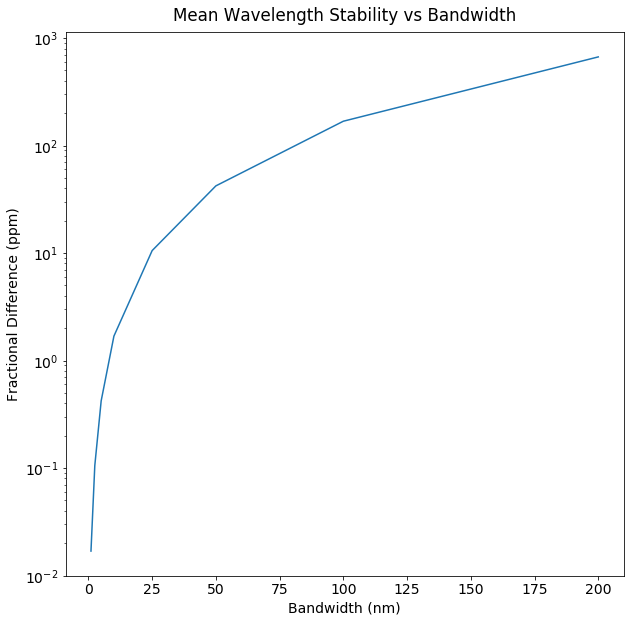

In [117]:
plt.semilogy(bandwidths,diffs)
plt.xlabel('Bandwidth (nm)')
plt.ylabel('Fractional Difference (ppm)')
plt.title('Mean Wavelength Stability vs Bandwidth',y=1.01)